In [ ]:
# load the fashion minst dataset

import tensorflow as tf

# Loading the fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Exploring the shape of the datasets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


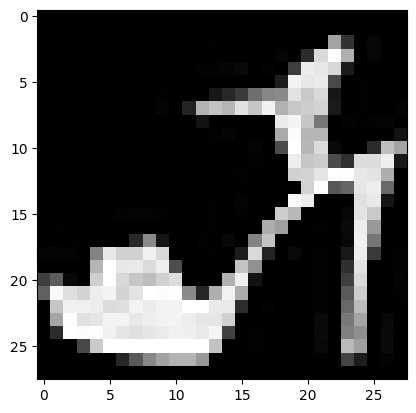

In [5]:
# plot the image from the data

import matplotlib.pyplot as plt

# Assuming x_train is your image data
plt.imshow(x_train[9], cmap='gray')
plt.show()

In [6]:
# normalize x_train and x_test

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

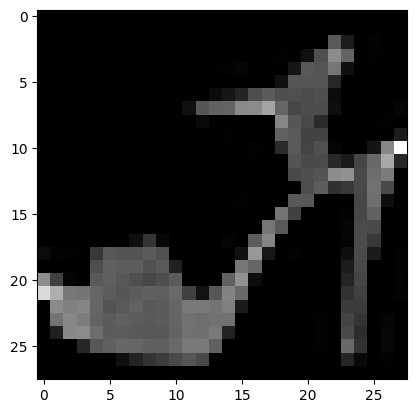

In [7]:
# plotting the normalized image
plt.imshow(x_train[9], cmap='gray')
plt.show()

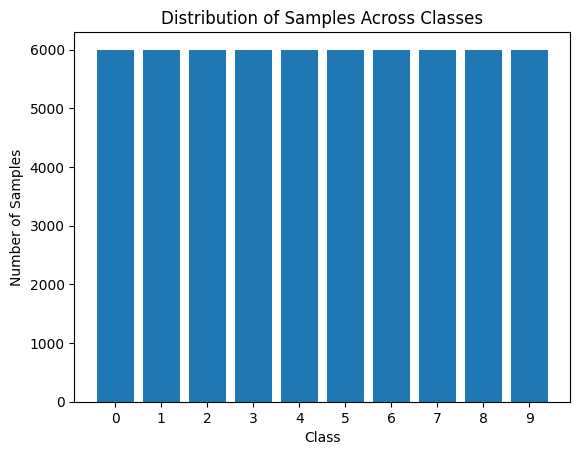

In [8]:
# Plotting a bar chart showing the distribution of samples across different classes.

import matplotlib.pyplot as plt

# Assuming y_train contains the class labels for your training data
class_counts = [sum(y_train == i) for i in range(10)]

plt.bar(range(10), class_counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Distribution of Samples Across Classes')
plt.xticks(range(10))
plt.show()
# There is uniform distribution among the classes

# This code builds a basic Artificial Neural Network (ANN) model using TensorFlow and Keras for image classification tasks, such as recognizing handwritten digits from 28x28 grayscale images (e.g., MNIST).
# The model starts with a Flatten layer that reshapes the 28x28 pixel input into a single 1D vector with 784 values. This step prepares the input for the dense layers by converting it from 2D to 1D.
# Next, a hidden Dense layer with 128 neurons is added, using the ReLU activation function. This hidden layer helps the model learn complex patterns, with ReLU introducing non-linearity to improve learning effectiveness.

In [ ]:


# Build the ANN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # Flatten the 28x28 images Input layer
model.add(tf.keras.layers.Dense(128, activation='relu'))  # Hidden layer with 128 neurons and ReLU activation
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (for 10 classes) and softmax activation


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Finally, the output Dense layer has 10 neurons, corresponding to the number of possible classes (e.g., digits 0-9). The softmax activation function converts the output into probabilities, indicating the model's confidence in each class. The class with the highest probability becomes the model's prediction.

In [ ]:
# The model is compiled using the Adam optimizer, which is an adaptive learning rate optimization algorithm that adjusts learning rates during training to improve performance and convergence. The loss function used is sparse_categorical_crossentropy, suitable for multi-class classification where target labels are provided as integers. The model also tracks accuracy as a performance metric, allowing us to monitor how well it classifies the training data.
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=32,validation_split=0.2)  # Adjust the number of epochs as needed



Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7614 - loss: 0.6947 - val_accuracy: 0.8558 - val_loss: 0.4048
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8557 - loss: 0.3940 - val_accuracy: 0.8588 - val_loss: 0.3834
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8731 - loss: 0.3461 - val_accuracy: 0.8752 - val_loss: 0.3454
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8813 - loss: 0.3203 - val_accuracy: 0.8757 - val_loss: 0.3344
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8904 - loss: 0.2923 - val_accuracy: 0.8668 - val_loss: 0.3549


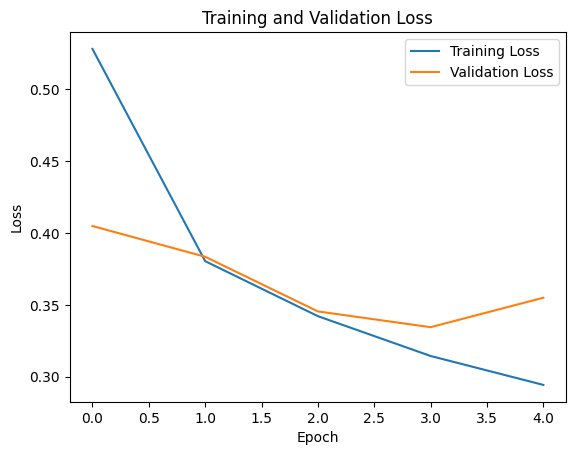

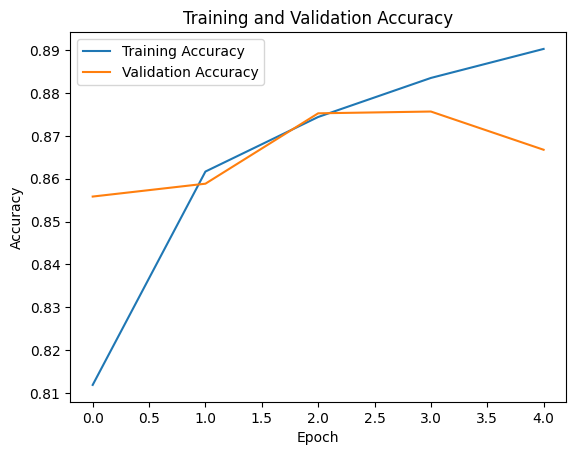

In [11]:
# visualizing the loss and accuracy for train and test


import matplotlib.pyplot as plt


# Plot the loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8623 - loss: 0.3744
Test accuracy: 0.8621000051498413


# This code generates and displays predictions made by the trained model on the test dataset.

# First, model.predict(x_test) produces class probability predictions for each test image. Then, the most likely class (i.e., the one with the highest probability) is extracted for each prediction using tf.argmax, and converted to a list of predicted class labels.



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


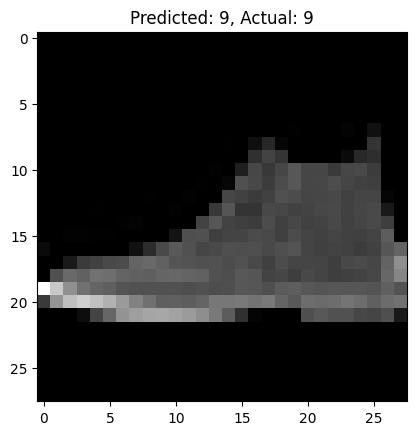

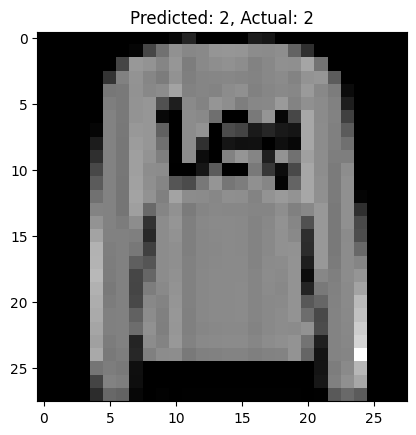

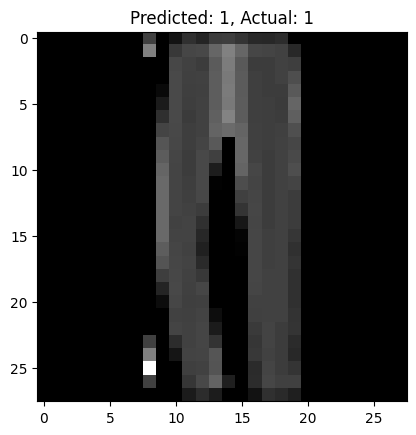

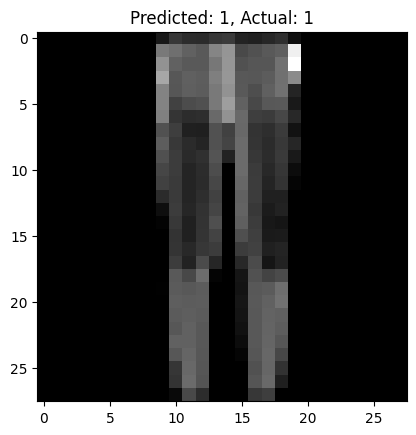

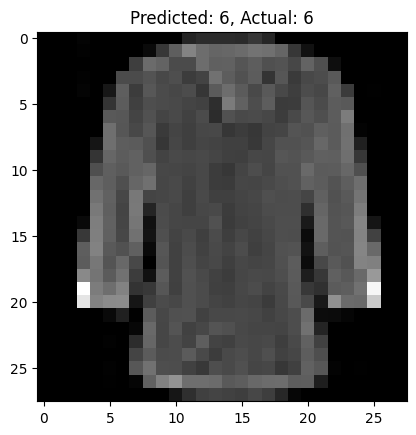

In [ ]:


# Predict classes for the test set
predictions = model.predict(x_test)

# Get the predicted class labels
predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]

# Display a few sample predictions along with the corresponding images
num_samples_to_display = 5
for i in range(num_samples_to_display):
  plt.imshow(x_test[i], cmap='gray')
  plt.title(f"Predicted: {predicted_labels[i]}, Actual: {y_test[i]}")
  plt.show()

# To visually assess model performance, the code displays a few test images alongwith their predicted and actual labels. For each sample, plt.imshow is used to display the grayscale image, while plt.title shows the predicted and actual class labels. This allows us to observe if the model’s predictions align with the true labels.

In [14]:
# generate another model with different parameters

# Build the ANN model with different parameters
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # Input layer: Flatten the 28x28 images
model.add(tf.keras.layers.Dense(256, activation='relu'))  # Hidden layer with 256 neurons and ReLU activation
model.add(tf.keras.layers.Dense(128, activation='relu'))  # Another hidden layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (for 10 classes) and softmax activation

# Compile the model
model.compile(optimizer='adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)  # Adjust the number of epochs as needed


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3162 - loss: 2.1845 - val_accuracy: 0.5958 - val_loss: 1.7273
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6090 - loss: 1.5708 - val_accuracy: 0.6677 - val_loss: 1.1878
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6684 - loss: 1.1175 - val_accuracy: 0.7030 - val_loss: 0.9460
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7013 - loss: 0.9135 - val_accuracy: 0.7221 - val_loss: 0.8287
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7281 - loss: 0.8151 - val_accuracy: 0.7403 - val_loss: 0.7590
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7452 - loss: 0.7539 - val_accuracy: 0.7562 - val_loss: 0.7127
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7594 - loss: 0.7095 - val_accuracy: 0.7710 - val_loss: 0.6782
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7686 - loss: 0.6788 - val_accuracy: 

In [15]:
# generate another model with different parameters

# Build the ANN model with different parameters
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))  # Input layer: Flatten the 28x28 images
model.add(tf.keras.layers.Dense(256, activation='relu'))  # Hidden layer with 256 neurons and ReLU activation
model.add(tf.keras.layers.Dense(128, activation='relu'))  # Another hidden layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))  # Output layer with 10 neurons (for 10 classes) and softmax activation

# Compile the model
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)  # Adjust the number of epochs as needed


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4628 - loss: 1.7789 - val_accuracy: 0.7100 - val_loss: 0.8436
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7209 - loss: 0.7865 - val_accuracy: 0.7608 - val_loss: 0.6643
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7755 - loss: 0.6377 - val_accuracy: 0.7929 - val_loss: 0.5787
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7999 - loss: 0.5693 - val_accuracy: 0.8060 - val_loss: 0.5350
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8115 - loss: 0.5332 - val_accuracy: 0.8186 - val_loss: 0.5045
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8200 - loss: 0.5022 - val_accuracy: 0.8250 - val_loss: 0.4847
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8284 - loss: 0.4805 - val_accuracy: 0.8322 - val_loss: 0.4678
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8345 - loss: 0.4648 - val_accuracy: 0.